In [1]:
import pandas as pd
import matplotlib.pyplot as plt

设置pandas显示选项, 使其显示所有的行,列及单个单元格中内容

**思考:如果不加这几行会发生什么?**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 1000)

载入共享单车停车点和订单数据

In [3]:
tcd = pd.read_csv('./data/gxdc_tcd.csv')
dd = pd.read_csv('./data/gxdc_dd.csv')

## 预览共享单车停车点数据

In [4]:
tcd.head()

,FENCE_ID,FENCE_LOC
0,长乐路0_L_A17001,"[118.103198,24.527338],[118.103224,24.527373],[118.103236,24.527366],[118.103209,24.527331],[118.103198,24.527338]"
1,长乐路0_L_A17002,"[118.103171,24.527303],[118.103198,24.527338],[118.103209,24.527331],[118.103182,24.527296],[118.103171,24.527303]"
2,长乐路0_L_A17003,"[118.103231,24.527386],[118.103257,24.527421],[118.10327,24.527413],[118.103244,24.527378],[118.103231,24.527386]"
3,长乐路0_L_A17004,"[118.103257,24.527421],[118.103282,24.527455],[118.103295,24.527447],[118.10327,24.527413],[118.103257,24.527421]"
4,长乐路0_L_A17005,"[118.102948,24.527003],[118.102979,24.527046],[118.102992,24.527038],[118.102961,24.526995],[118.102948,24.527003]"


可以看出停车点数据集中的FENCE_LOC像是几个列表,但是在python数据结构中真的如此吗?

In [5]:
for col in tcd.iloc[0, :]:
    print(type(col))
    print(col)
    print('\n')

<class 'str'>
长乐路0_L_A17001


<class 'str'>
[118.103198,24.527338],[118.103224,24.527373],[118.103236,24.527366],[118.103209,24.527331],[118.103198,24.527338]




In [6]:
tcd.iloc[0,1][0]

'['

可以看出停车点的第二列以字符串形式存储,我们是无法直接使用类似`tcd.iloc[0,1][0]`, `tcd.iloc[0,1][1]`的代码提取`[118.103198,24.527338]`,`[118.103224,24.527373]`这样的坐标的. 使用`tcd.iloc[0,1][0]`只会输出`[`也就是字符串`[118.103198,24.527338],[118.103224,24.527373],[118.103236,24.527366],[118.103209,24.527331],[118.103198,24.527338]`的第一个字符

所以我们需要对FENCE_LOC进行特殊处理,使其在被pandas读入之后以列表或元组形式存储,这样我们才能正确地使用上述代码取到围栏四角坐标

In [7]:
# 如果之前已经知道停车围栏坐标是由几个列表组成的,那么将读取代码改成这样
# tcd = pd.read_csv('./data/gxdc_tcd.csv', converters={'FENCE_LOC': eval})
# 这样能在读入的时候把FENCE_LOC列数据变为元组
# 如果已经读进来了,就对现有的,被读成字符串的列表做eval, 使其转换为元组
tcd['FENCE_LOC'] = tcd['FENCE_LOC'].apply(lambda x: eval(x))
# 上面注释掉的代码和没注释掉的代码效果一样, 只不过如果已经读入了,注释掉的代码会再读一遍

In [8]:
tcd.head()

,FENCE_ID,FENCE_LOC
0,长乐路0_L_A17001,"([118.103198, 24.527338], [118.103224, 24.527373], [118.103236, 24.527366], [118.103209, 24.527331], [118.103198, 24.527338])"
1,长乐路0_L_A17002,"([118.103171, 24.527303], [118.103198, 24.527338], [118.103209, 24.527331], [118.103182, 24.527296], [118.103171, 24.527303])"
2,长乐路0_L_A17003,"([118.103231, 24.527386], [118.103257, 24.527421], [118.10327, 24.527413], [118.103244, 24.527378], [118.103231, 24.527386])"
3,长乐路0_L_A17004,"([118.103257, 24.527421], [118.103282, 24.527455], [118.103295, 24.527447], [118.10327, 24.527413], [118.103257, 24.527421])"
4,长乐路0_L_A17005,"([118.102948, 24.527003], [118.102979, 24.527046], [118.102992, 24.527038], [118.102961, 24.526995], [118.102948, 24.527003])"


In [9]:
for col in tcd.iloc[0, :]:
    print(type(col))
    print(col)
    print('\n')

<class 'str'>
长乐路0_L_A17001


<class 'tuple'>
([118.103198, 24.527338], [118.103224, 24.527373], [118.103236, 24.527366], [118.103209, 24.527331], [118.103198, 24.527338])




现在就可以使用定位方式取到围栏四角坐标了

In [10]:
tcd.iloc[0,1][0]

[118.103198, 24.527338]

In [11]:
tcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14071 entries, 0 to 14070
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FENCE_ID   14071 non-null  object
 1   FENCE_LOC  14071 non-null  object
dtypes: object(2)
memory usage: 220.0+ KB


从info中我们可以看出, 数据集有14071行,而FENCE_ID和FENCE_LOC中的非空数据量均为14071, 所以我们不需要对空值进行处理

In [12]:
tcd.describe()

,FENCE_ID,FENCE_LOC
count,14071,14071
unique,14071,14071
top,厦禾路0_R_60,"([118.0717758256, 24.4641683573], [118.0717886, 24.46423061], [118.0718009744, 24.4642284827], [118.0717882, 24.46416623], [118.0717758256, 24.4641683573])"
freq,1,1


从describe中可以看出, 这14071个FENCE_ID和14071个FENCE_LOC都是没有重复的, 我们也无需进行去重操作

## 预览共享单车订单数据

In [13]:
dd.head()

,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME
0,f8f99ef8d9bd3942580c2f8f5d1232ba,24.495537,118.126619,0,2020/12/22 6:25:56
1,8d1abc077be52af3eecf8340f4ea6981,24.443596,118.083372,0,2020/12/22 6:25:57
2,1122da7c68701a8d60df2eb7a89b6452,24.485108,118.092266,1,2020/12/22 6:25:58
3,324943a3613a133055f4f2e4162cef5f,24.501391,118.083000,1,2020/12/22 6:25:59
4,f6720d758b03dcec0765e49b4ce46111,24.483700,118.117027,1,2020/12/22 6:25:59


最后一列是时间,和上面的停车点坐标一样,如果不加以特殊处理会以字符串形式存储,所以我们需要将其重新存储为时间格式

In [14]:
dd['UPDATE_TIME'] = pd.to_datetime(dd['UPDATE_TIME'], format='%Y/%m/%d %H:%M:%S')

In [15]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585292 entries, 0 to 585291
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   BICYCLE_ID   585292 non-null  object        
 1   LATITUDE     585292 non-null  float64       
 2   LONGITUDE    585292 non-null  float64       
 3   LOCK_STATUS  585292 non-null  int64         
 4   UPDATE_TIME  585292 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 22.3+ MB


从info中可以看出,订单数据中同样没有空值

In [16]:
# 如果不加include = 'all', 在有非object类型列的前提下,describe不会输出object类型列的描述
dd.describe(include = 'all')

<ipython-input-16-644fca726a72>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dd.describe(include = 'all')


,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME
count,585292,585292.000000,585292.000000,585292.000000,585292
unique,53630,NaN,NaN,NaN,67030
top,1677a23507c85c2e90f7d6f7fb30d07e,NaN,NaN,NaN,2020-12-25 08:18:42
freq,687,NaN,NaN,NaN,55
first,NaN,NaN,NaN,NaN,2020-12-21 06:00:01
last,NaN,NaN,NaN,NaN,2020-12-25 09:59:59
mean,NaN,24.493837,118.126170,0.384367,NaN
std,NaN,0.023531,0.031745,0.486446,NaN
min,NaN,24.425358,118.058908,0.000000,NaN
25%,NaN,24.476612,118.100946,0.000000,NaN


对于非object数据, top, unique和freq会显示为NAN

而对于object数据,标准差,平均值,分位数等统计信息会显示为NAN

从describe中可以看出, 这58.52万个订单数据是由53630辆共享单车产生的, ID为1677a23507c85c2e90f7d6f7fb30d07e产生了最多的,687个订单

比赛要求的时间段为7:00-9:00, 从UPDATE_TIME的描述中可以看出最早的数据在早上六点,最晚在9:59:59, 和官网描述一致.我们应去除早于7点的,和9点后的数据

从官网数据介绍中我们可以知道LOCK_STATUS是锁的状态, 0为开锁, 1为关锁.按理来说一个开锁应该配一个关锁的,即使数据被截断,开关锁的数据量差距也不会很大,mean应该接近0.5,这里mean为什么是0.384367?

我们需要对开关锁状态进行进一步探索

In [17]:
dd = dd[(dd["UPDATE_TIME"].dt.hour >= 7) & (dd["UPDATE_TIME"].dt.hour < 9)] #删除7点前和9点后数据

In [18]:
dd['LOCK_STATUS'].value_counts()

0    270504
1    167211
Name: LOCK_STATUS, dtype: int64

7点到9点之间的开关锁数据并不平衡,开锁数量远多于关锁
我们来做个透视表查看

In [19]:
dd['DAY'] = dd['UPDATE_TIME'].dt.day # 将每一天分离出来
dd_pivot = pd.pivot_table(dd,index=['BICYCLE_ID', 'DAY', 'LOCK_STATUS'], aggfunc={'LOCK_STATUS':len}) # 根据车辆ID,归属的日,开关锁状态进行数量统计

透视表长这样:

In [20]:
dd_pivot.head(10)

LOCK_STATUS
BICYCLE_ID                       DAY LOCK_STATUS             
0000ff105fd5f9099b866bccd157dc50 21  0                      1
                                     1                      1
                                 22  0                      4
                                     1                      4
                                 24  0                      2
                                     1                      2
00034c3b03361e84da499169e51b2315 22  0                      2
                                     1                      2
0003fd17bc68116eb180bf44a52f732e 24  0                      1
                                     1                      1

也可以使用rename把LOCK_STATUS的统计重命名一下,对于强迫症来说这样看起来舒服点

In [21]:
dd_pivot.rename(columns={'LOCK_STATUS': 'LOCK_STATUS_CNT'}, inplace = True)
dd_pivot.head(10)

LOCK_STATUS_CNT
BICYCLE_ID                       DAY LOCK_STATUS                 
0000ff105fd5f9099b866bccd157dc50 21  0                          1
                                     1                          1
                                 22  0                          4
                                     1                          4
                                 24  0                          2
                                     1                          2
00034c3b03361e84da499169e51b2315 22  0                          2
                                     1                          2
0003fd17bc68116eb180bf44a52f732e 24  0                          1
                                     1                          1

我们需要找到一辆LOCK_STATUS不正常(即, 开锁数量-关锁数量大于1)的车来进行观察

In [22]:
abnormal_bike = None #这步其实可以不写,在这个数据集中不会出错.但是初始化数据是一个好习惯.否则在下面for循环中如果没有找到符合if中条件的数据会报错
abnormal_day = None
# bikes_ls = sorted(list(set(dd_pivot.index.get_level_values(0).tolist())))
# days = sorted(list(set(dd_pivot.index.get_level_values(1).tolist()))) # set的作用都是去重.其实这里不一定需要转为list后再进行排列,这个操作只是为了使得每次输出的abnormal_bike都一样
bikes_ls = set(dd_pivot.index.get_level_values(0).tolist())
days = set(dd_pivot.index.get_level_values(1).tolist())
exit_flag = False # 用于跳出多层循环的标志
for bike in bikes_ls:
    for d in days:
    # level=和里面的东西可以不填,这里只是为了让大家理解.筛选pandas pivot table中内容的教程晚上比较难找到
    # 关于xs的一些例子: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html
    # 这两个巨大的if...else判定是为了防止部分车辆在某一天没有开锁数据或者关锁数据导致的报错.如果没有,就记为0
        current_zero = dd_pivot.xs((bike, d, 0), level = [0, 1, 'LOCK_STATUS']).values.item() if dd_pivot.xs((bike, d, 0), level = [0, 1, 'LOCK_STATUS']).empty == False else 0
        current_one = dd_pivot.xs((bike, d, 1), level = [0, 1, 'LOCK_STATUS']).values.item() if dd_pivot.xs((bike, d, 1), level = [0, 1, 'LOCK_STATUS']).empty == False else 0
        # 如果当日开/关锁数据之差大于1
        if abs(current_zero - current_one) > 1:
            print("ID为 {bike_id} 的共享单车在{day}日的LOCK_STATUS不正常, 其开锁数量为{zero},关锁数量为{one}".format(bike_id = bike,day = abnormal_day, zero = current_zero, one = current_one))
            abnormal_bike = bike
            abnormal_day = d
            exit_flag = True
            break
    if exit_flag: # 如果跳出多层循环的标志是True,就退出
        break

ID为 f3bf2e7036fd8ab3a992c5a4a7dfd2ba 的共享单车在None日的LOCK_STATUS不正常, 其开锁数量为38,关锁数量为3


我们来看看这辆车的开关锁数据发生了什么奇怪的事情

In [23]:
abnormal_example = dd.loc[(dd['BICYCLE_ID'] == abnormal_bike) & (dd['DAY'] == abnormal_day)] # 筛选出id等于abnormal_value的单车
abnormal_example.sort_values("UPDATE_TIME", inplace = True) # 按照时间排列该车开关锁数据
abnormal_example

<ipython-input-23-eebab2b6ba88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal_example.sort_values("UPDATE_TIME", inplace = True) # 按照时间排列该车开关锁数据


,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME,DAY
243398,f3bf2e7036fd8ab3a992c5a4a7dfd2ba,24.476061,118.098778,0,2020-12-25 07:00:59,25
266802,f3bf2e7036fd8ab3a992c5a4a7dfd2ba,24.476091,118.099177,0,2020-12-25 07:01:16,25
243397,f3bf2e7036fd8ab3a992c5a4a7dfd2ba,24.475979,118.098717,0,2020-12-25 07:01:27,25
243396,f3bf2e7036fd8ab3a992c5a4a7dfd2ba,24.476056,118.098664,0,2020-12-25 07:01:39,25
243395,f3bf2e7036fd8ab3a992c5a4a7dfd2ba,24.476133,118.098604,0,2020-12-25 07:01:49,25
243394,f3bf2e7036fd8ab3a992c5a4a7dfd2ba,24.476356,118.098507,0,2020-12-25 07:02:24,25
243393,f3bf2e7036fd8ab3a992c5a4a7dfd2ba,24.476254,118.098378,0,2020-12-25 07:03:11,25
243392,f3bf2e7036fd8ab3a992c5a4a7dfd2ba,24.476106,118.098435,0,2020-12-25 07:03:17,25
243391,f3bf2e7036fd8ab3a992c5a4a7dfd2ba,24.476541,118.098350,0,2020-12-25 07:03:35,25
243390,f3bf2e7036fd8ab3a992c5a4a7dfd2ba,24.476472,118.098234,0,2020-12-25 07:03:41,25


不用管那个warming,这是由于设置了`inplace=True`,使得重新排序后的abnormal_example覆盖了老的abnormal_example导致的.

如果觉得碍眼,在代码开始`import pandas as pd`后加一行`pd.set_option('mode.chained_assignment', None)`即可关闭此类提醒信息

从以上单车信息中我们可以发现存在着很多连续的0.使用matplotlib进行可视化,试图还原该车辆开关锁发生坐标

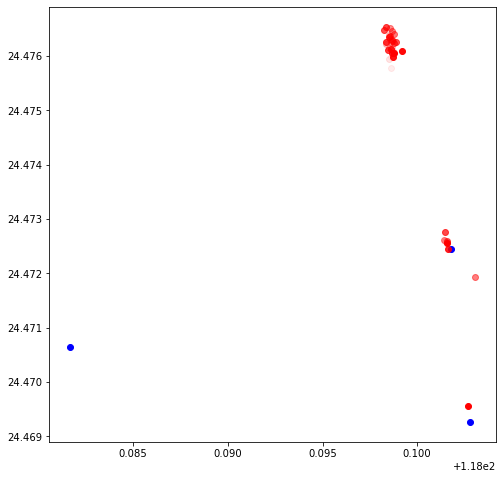

In [24]:
lock_data = {'longitudes':[], 'latitudes': [], 'transparency': []}
unlock_data = {'longitudes':[], 'latitudes': [], 'transparency': []}
last_status = None #前一行开关锁状态
tmp_saving_idx = []

for idx in range(len(abnormal_example)):
    cur_status = abnormal_example['LOCK_STATUS'].iloc[idx]
    if cur_status == last_status or idx == 0:
        tmp_saving_idx.append(idx)
    else: #如果状态变化
        step = 1/len(tmp_saving_idx) if tmp_saving_idx else 1
        if cur_status == 0: #如果当前状态是开锁,即在tmp_saving_idx中保留的数据状态是关锁, 则关锁的数据应随时间增加变深
            cur_trans = 1
            while tmp_saving_idx:
                curidx = tmp_saving_idx.pop()
                lock_data['longitudes'].append(abnormal_example['LONGITUDE'].iloc[curidx])
                lock_data['latitudes'].append(abnormal_example['LATITUDE'].iloc[curidx])
                lock_data['transparency'].append(cur_trans)
                cur_trans -= step
        else:
            cur_trans = step
            while tmp_saving_idx:
                curidx = tmp_saving_idx.pop()
                unlock_data['longitudes'].append(abnormal_example['LONGITUDE'].iloc[curidx])
                unlock_data['latitudes'].append(abnormal_example['LATITUDE'].iloc[curidx])
                unlock_data['transparency'].append(min(1, cur_trans)) # prevent from overflow
                cur_trans += step
        tmp_saving_idx.append(idx)
    last_status = cur_status
# release data stored in tmp_saving_idx
if tmp_saving_idx:
    step = 1/len(tmp_saving_idx) if tmp_saving_idx else 1
    if last_status == 0: #如果前面保存的状态时状态是开锁,则将tmp_saving_idx中保存的东西加入开锁
        cur_trans = step
        while tmp_saving_idx:
            curidx = tmp_saving_idx.pop()
            unlock_data['longitudes'].append(abnormal_example['LONGITUDE'].iloc[curidx])
            unlock_data['latitudes'].append(abnormal_example['LATITUDE'].iloc[curidx])
            unlock_data['transparency'].append(max(1, cur_trans)) # prevent from overflow
            cur_trans += step
    else:
        cur_trans = 1
        while tmp_saving_idx:
            curidx = tmp_saving_idx.pop()
            lock_data['longitudes'].append(abnormal_example['LONGITUDE'].iloc[curidx])
            lock_data['latitudes'].append(abnormal_example['LATITUDE'].iloc[curidx])
            lock_data['transparency'].append(cur_trans)
            cur_trans -= step
plt.figure(figsize=(8,8))
for i in range(len(lock_data['latitudes'])):
    plt.scatter(x = lock_data['longitudes'][i], y = lock_data['latitudes'][i], alpha = lock_data['transparency'][i], color = 'blue')
for i in range(len(unlock_data['latitudes'])):
    plt.scatter(x = unlock_data['longitudes'][i], y = unlock_data['latitudes'][i], alpha = unlock_data['transparency'][i], color = 'red')

可以看出开锁数据在发生时,自行车是持续移动的,所以我们需要保留自行车状态(活动转为静止,或静止转为活动)变化时产生的数据.即,对于连续的开锁数据,仅保留第一个;对于连续的关锁数据,仅保留最后一个

In [25]:
dd.sort_values(["BICYCLE_ID", "UPDATE_TIME"], ignore_index = True, inplace = True)
outbikes = pd.DataFrame(dd[dd['LOCK_STATUS'] == 0], columns = ['BICYCLE_ID', 'DAY', 'LOCK_STATUS'])
outbikes['IDX'] = outbikes.index

inbikes = pd.DataFrame(dd[dd['LOCK_STATUS'] == 1], columns = ['BICYCLE_ID', 'DAY', 'LOCK_STATUS'])
inbikes['IDX'] = inbikes.index

outbikes = outbikes.loc[(outbikes['BICYCLE_ID'].shift(1) != outbikes['BICYCLE_ID'])|(outbikes['DAY'].shift(1) != outbikes['DAY'])|(outbikes['IDX'].shift(1) != outbikes['IDX'] - 1)]
inbikes = inbikes.loc[(inbikes['BICYCLE_ID'].shift(-1) != inbikes['BICYCLE_ID'])|(inbikes['DAY'].shift(-1) != inbikes['DAY'])|(inbikes['IDX'].shift(-1) != inbikes['IDX'] + 1)]

In [26]:
cleaned_col_idx = inbikes.index.values.tolist() + outbikes.index.values.tolist()
cleaned_dd = dd.loc[cleaned_col_idx, :]
cleaned_dd.sort_values(["UPDATE_TIME"], ignore_index = True, inplace = True)

In [27]:
check = cleaned_dd.loc[(cleaned_dd['BICYCLE_ID'] == abnormal_bike) & (cleaned_dd['DAY'] == abnormal_day)].copy()
check

AttributeError: 'NoneType' object has no attribute 'loc'

In [ ]:
cleaned_dd.to_csv('removed_abnormal.csv', index = False)